In [12]:
library(tidyverse)

`%+replace%` <- ggplot2::`%+replace%`

theme_zietzm <- function(base_size = 11.5, base_family = "") {
    # Starts with theme_bw and then modify some parts
    # Theme options are documentated at http://docs.ggplot2.org/current/theme.html
    ggplot2::theme_classic(base_size = base_size, base_family = base_family) %+replace%
    ggplot2::theme(

        strip.background  = ggplot2::element_rect(fill = NA, colour = 'grey90', size = 0),
        strip.text = element_text(vjust = 1, size = 10),
        plot.margin       = ggplot2::margin(t=2, r=2, b=2, l=2, unit='pt'),
        legend.spacing     = grid::unit(0.1, 'cm'),
        legend.key        = ggplot2::element_blank(),
        panel.border=element_rect(fill = NA, color = 'black', size = 0.5), 
        axis.line=element_line(size=0),
    )
}

In [6]:
df <- read_tsv('hetionet-prior/full_priors/AlD.tsv.gz')

df %>% head

Parsed with column specification:
cols(
  source_id = col_double(),
  target_id = col_double(),
  edge = col_logical(),
  source_degree = col_double(),
  target_degree = col_double(),
  xswap_prior = col_double()
)


source_id,target_id,edge,source_degree,target_degree,xswap_prior
<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>
0,0,FALSE,7,4,0.006785714
0,1,FALSE,7,16,0.031190476
0,2,FALSE,7,37,0.079285714
0,3,FALSE,7,4,0.006785714
0,4,FALSE,7,0,0.000000000
0,5,FALSE,7,58,0.116428571


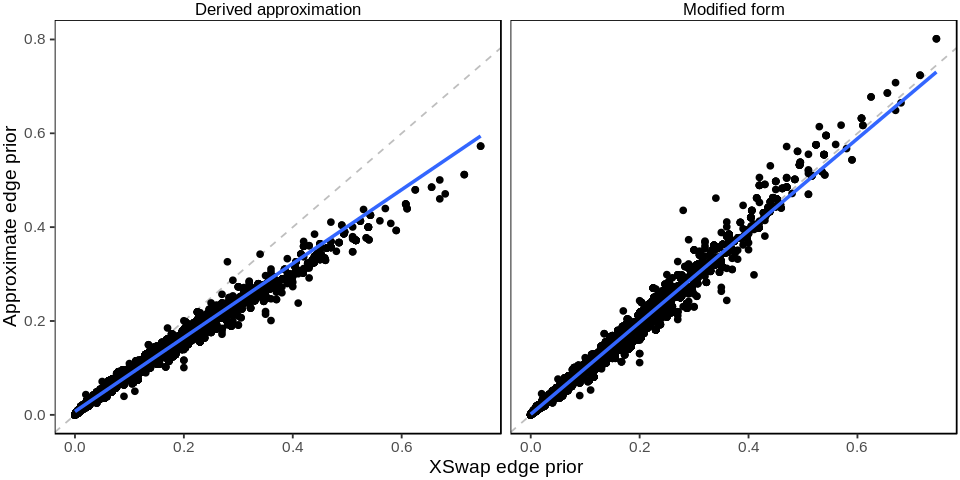

In [14]:
options(repr.plot.width=8, repr.plot.height=4)

df %>%
mutate(
    approx_1 = source_degree * target_degree / (sum(edge) - source_degree - target_degree 
                                                + source_degree * target_degree + 1),
    approx_2 = source_degree * target_degree / sqrt((source_degree * target_degree) ** 2
                                                    + (sum(edge) - source_degree - target_degree + 1) ** 2),
) %>%
gather('prior_type', 'prior', approx_1, approx_2) %>%
mutate(prior_type = prior_type %>% recode_factor(approx_1 = 'Derived approximation',
                                                 approx_2 = 'Modified form')) %>%
ggplot(aes(x = xswap_prior, y = prior)) +
geom_abline(color = 'grey', linetype = 'dashed') +
geom_point() +
geom_smooth(method = 'lm') +
facet_wrap(vars(prior_type)) +
ylab('Approximate edge prior') +
xlab('XSwap edge prior') +
theme_zietzm()